In [1]:
# TITLE

### Imports

In [27]:
import altair as alt

In [28]:
from nnanno.sample import *
import pandas as pd
from pathlib import Path
import re

In [29]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# View the amount of data per year

## Loading previous counts 


In [30]:
sampler = nnSampler()

In [31]:
df = sampler.population

## Plotting 

We can use the usual pandas plotting to get an overview of this data

In [32]:
df = df.reset_index()

In [33]:
df

,index,ads_count,photos_count,maps_count,illustrations_count,comics_count,cartoons_count,headlines_count,total
0,1850,8841,22,5,671,9,0,11243,20791
1,1851,10065,20,6,457,7,0,12262,22817
2,1852,8764,22,10,671,10,8,13524,23009
3,1853,11517,45,5,1106,88,1,13224,25986
4,1854,15050,221,15,732,11,3,15282,31314
...,...,...,...,...,...,...,...,...,...
96,1946,185139,5945,1857,1053,3280,861,68275,266410
97,1947,181223,4188,1750,1115,3630,797,57018,249721
98,1948,152987,4282,1359,1154,3031,624,43432,206869
99,1949,154510,6015,1888,1280,3356,634,42904,210587


In [8]:
alt.Chart(df.reset_index()).mark_line().encode(x=alt.X('index:T',title='year'),y='total')

alt.Chart(...)

## ads only 


Bad key "text.kerning_factor" on line 4 in
/anaconda/envs/nnanno/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


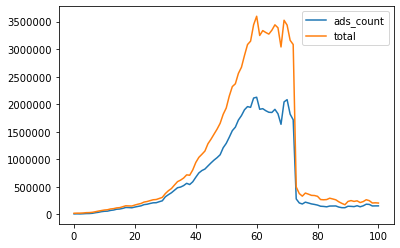

In [9]:
df[['ads_count','total']].plot()

## What does this tell us? 

This chart shows us
- the number of images predicted as adverts (and the total of all images) predicted by the Newspaper Navigator 

There are also a few things which this doesn't show:
- that adverts the number of adverts grew over time. This growth may be explained by more newspapers being published over time, better classifications of adverts by the newspaper navigator algorithm in later years,or a larger body of digitsed material overall in the LOC collection. 

# Creating a sample

In [10]:
sampler = nnSampler()

In [11]:
df = sampler.create_sample(500, 'photos', end_year=1950, step=5, year_sample=False)

In [12]:
df

,filepath,pub_date,page_seq_num,edition_seq_num,batch,lccn,box,score,ocr,place_of_publication,geographic_coverage,name,publisher,url,page_url
0,ohi_ingstad_ver01/data/sn85026051/00296027029/...,1850-07-27,37,1,ohi_ingstad_ver01,sn85026051,"[0.29913574490319106, 0.622813938380955, 0.430...",0.980025,"[ht, I, ', Wll., ., III, tl, T, ., ""', ""', "", ...","Fremont, Sandusky County, Ohio",[Ohio--Sandusky--Fremont],Fremont weekly freeman. [volume],J.S. Fouke,https://news-navigator.labs.loc.gov/data/ohi_i...,https://chroniclingamerica.loc.gov/data/batche...
1,ohi_ingstad_ver01/data/sn85026051/00296027029/...,1850-07-20,33,1,ohi_ingstad_ver01,sn85026051,"[0.3009427797781111, 0.6294158908847332, 0.433...",0.929614,"[L, -, COME, IN,, WE, CALL, YOU, !, .v';:]","Fremont, Sandusky County, Ohio",[Ohio--Sandusky--Fremont],Fremont weekly freeman. [volume],J.S. Fouke,https://news-navigator.labs.loc.gov/data/ohi_i...,https://chroniclingamerica.loc.gov/data/batche...
2,ohi_ingstad_ver01/data/sn85026051/00296027029/...,1850-08-24,53,1,ohi_ingstad_ver01,sn85026051,"[0.4334465613731971, 0.6177851558250381, 0.565...",0.979533,"[COME, IN,, WE, CALL, YOU!]","Fremont, Sandusky County, Ohio",[Ohio--Sandusky--Fremont],Fremont weekly freeman. [volume],J.S. Fouke,https://news-navigator.labs.loc.gov/data/ohi_i...,https://chroniclingamerica.loc.gov/data/batche...
3,ohi_ingstad_ver01/data/sn85026051/00296027029/...,1850-12-07,115,1,ohi_ingstad_ver01,sn85026051,"[0.30707743987524494, 0.6473851770787806, 0.44...",0.984739,"[COME, IN,, WE, CALL, YOU!]","Fremont, Sandusky County, Ohio",[Ohio--Sandusky--Fremont],Fremont weekly freeman. [volume],J.S. Fouke,https://news-navigator.labs.loc.gov/data/ohi_i...,https://chroniclingamerica.loc.gov/data/batche...
4,ohi_ingstad_ver01/data/sn85026051/00296027029/...,1850-08-17,49,1,ohi_ingstad_ver01,sn85026051,"[0.2943367379610656, 0.6305186744386874, 0.426...",0.956234,"[COME, IN,, WE, CALL, YOU, !, o]","Fremont, Sandusky County, Ohio",[Ohio--Sandusky--Fremont],Fremont weekly freeman. [volume],J.S. Fouke,https://news-navigator.labs.loc.gov/data/ohi_i...,https://chroniclingamerica.loc.gov/data/batche...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509,dlc_2kandinsky_ver01/data/sn83045462/002806062...,1950-04-16,308,1,dlc_2kandinsky_ver01,sn83045462,"[0.7259785753615359, 0.12310335968651474, 0.79...",0.924753,[],"Washington, D.C.",[District of Columbia--Washington],Evening star. [volume],W.D. Wallach & Hope,https://news-navigator.labs.loc.gov/data/dlc_2...,https://chroniclingamerica.loc.gov/data/batche...
510,mthi_clarkia_ver01/data/sn84027524/00415666949...,1950-04-14,328,1,mthi_clarkia_ver01,sn84027524,"[0.52861296141512, 0.6838467377404825, 0.90079...",0.981826,"[i, ■, %, 2, $, J, P, B, H, I, è, -, -,, •«, j...","Columbia Falls, Mont.",[Montana--Flathead--Columbia Falls],Hungry Horse news. [volume],M. Ruder,https://news-navigator.labs.loc.gov/data/mthi_...,https://chroniclingamerica.loc.gov/data/batche...
511,dlc_2kandinsky_ver01/data/sn83045462/002806065...,1950-09-29,517,1,dlc_2kandinsky_ver01,sn83045462,"[0.08020366688884756, 0.22635183320137853, 0.1...",0.939514,"[is, to, na, the, c, F-, Cock*]","Washington, D.C.",[District of Columbia--Washington],Evening star. [volume],W.D. Wallach & Hope,https://news-navigator.labs.loc.gov/data/dlc_2...,https://chroniclingamerica.loc.gov/data/batche...
512,dlc_2kandinsky_ver01/data/sn83045462/002806063...,1950-06-25,47,1,dlc_2kandinsky_ver01,sn83045462,"[0.670413511248018, 0.12242209964963807, 0.734...",0.949989,[],"Washington, D.C.",[District of Columbia--Washington],Evening star. [volume],W.D. Wallach & Hope,https://news-navigator.labs.loc.gov/data/dlc_2...,https://chroniclingamerica.loc.gov/data/batche...
